In [20]:
# importing required library to perform feature selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.preprocessing import StandardScaler

# importing the dataset
input_file = "chowdary.csv"
df = pd.read_csv(input_file)

# seperating the independent and dependent variables
X = df.iloc[:, 3:]
Y = df.iloc[:, 1]

# splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert back to DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [22]:
# summarizing the dataset
# number of 'B' and 'C' in training and testing set
print("The number of 'B' and 'C' in training set: ", Y_train.value_counts())
print("The number of 'B' and 'C' in testing set: ", Y_test.value_counts())
print("The shape of the training set is: ", X_train_normalized_df.shape)
print("The shape of the testing set is: ", X_test_normalized_df.shape)


The number of 'B' and 'C' in training set:  tumour
B    44
C    28
Name: count, dtype: int64
The number of 'B' and 'C' in testing set:  tumour
B    18
C    14
Name: count, dtype: int64
The shape of the training set is:  (72, 181)
The shape of the testing set is:  (32, 181)


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(penalty = 'l2', max_iter=500)
cv = StratifiedKFold(n_splits=5)
rfecv = RFECV(estimator, step=1, cv=cv, scoring="accuracy")
# Define the parameter grid
param_grid = {
    'step': [1, 5, 10],
    'cv': [StratifiedKFold(n_splits=2), StratifiedKFold(n_splits=5), StratifiedKFold(n_splits=10)]
}

# Create the grid search object
grid_search = GridSearchCV(rfecv, param_grid, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_normalized_df, Y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'cv': StratifiedKFold(n_splits=2, random_state=None, shuffle=False), 'step': 1}


In [24]:
# getting optimal number of features using RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# initializing the estimator model
estimator = LogisticRegression(penalty = 'l2',max_iter=500)

# setting up the RFECV with the estimator and cross-validation strategy
cv = StratifiedKFold(n_splits=2)
rfecv = RFECV(estimator, step=1, cv=cv, scoring='accuracy')

# fitting the data to the model
rfecv.fit(X_train_normalized_df, Y_train)

# getting the optimal number of features
optimal_n_features = rfecv.n_features_
print("Optimal number of features : %d" % optimal_n_features)

# naming of the features selected
selected_features = X_train_normalized_df.columns[rfecv.support_]
print("Selected features : %s" % selected_features)

# getting the cross-validated scores for each number of features
cv_scores = rfecv.cv_results_['mean_test_score']
# cv_scores = [score for i, score in enumerate(rfecv.cv_results_['mean_test_score']) if i in rfecv.get_support(indices=True)]


# getting the number of features for each iteration
n_features = list(range(1, len(cv_scores) + 1))


Optimal number of features : 3
Selected features : Index(['X202831_at', 'X204653_at', 'X218847_at'], dtype='object')


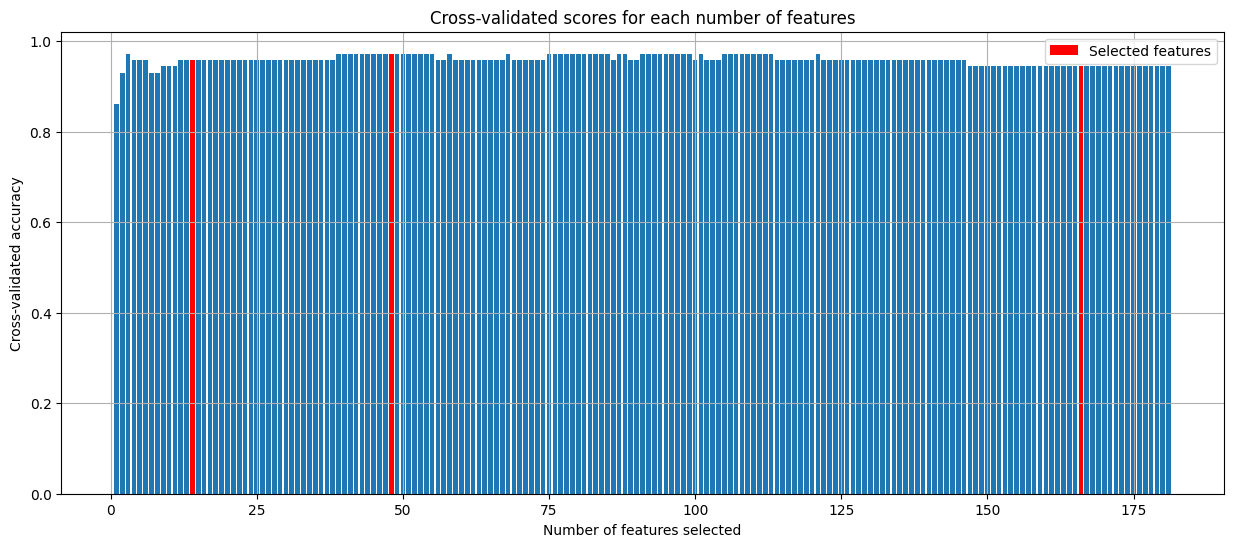

In [25]:
# plotting the accuracy vs number of features
plt.figure(figsize=(15, 6))
plt.bar(n_features, cv_scores)

# Highlight the selected features in red
selected_feature_indices = [list(X_train_normalized_df.columns).index(f) for f in selected_features]
selected_cv_scores = cv_scores[selected_feature_indices]
plt.bar(np.array(selected_feature_indices) + 1, selected_cv_scores, color='red', label='Selected features')

plt.xlabel("Number of features selected")
plt.ylabel("Cross-validated accuracy")
plt.title("Cross-validated scores for each number of features")

plt.legend()
plt.grid()
plt.show()

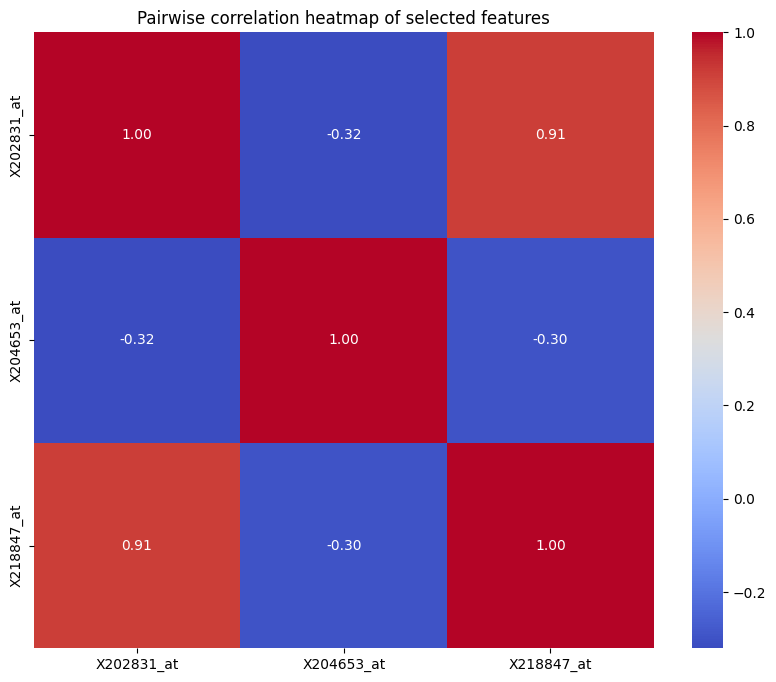

In [26]:
# plotting the heatmap of correlation matrix
# creating a dataframe with selected features
selected_data = X_train_normalized_df[selected_features]

# getting the correlation matrix
corr_matrix = selected_data.corr()

# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pairwise correlation heatmap of selected features")
plt.show()

In [7]:
# selected features, 'X202859_x_at', 'X203951_at', 'X205044_at', 'X205941_s_at', 'X209604_s_at', 'X213435_at', 'X217148_x_at'
# Create a contingency table for 'feature1' and 'feature2'
from scipy.stats import ttest_ind

# Perform an independent t-test between two groups
# group1 = X_train.loc[Y_train == 'B', 'X202859_x_at']
# group2 = X_train.loc[Y_train == 'C', 'X203951_at']
# t_stat, p_value = ttest_ind(group1, group2)

# # Print the t-statistic and p-value
# print("t-statistic:", t_stat)
# print("p-value:", p_value)

# plot_conditional_prob('X202859_x_at', 'X203951_at')

# Loop through all pairs of features and compute conditional probabilities
# for i, feature1 in enumerate(selected_features):
#     for j, feature2 in enumerate(selected_features):
#         if i != j:
#             plot_conditional_prob(feature1, feature2)

t-statistic: -2.554242212399358
p-value: 0.0125153858117985


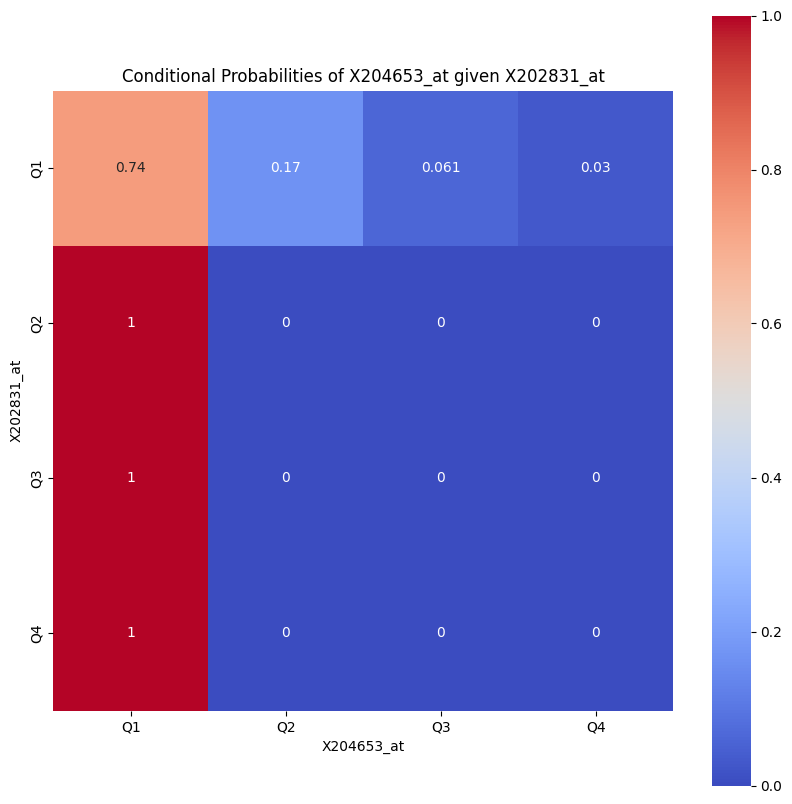

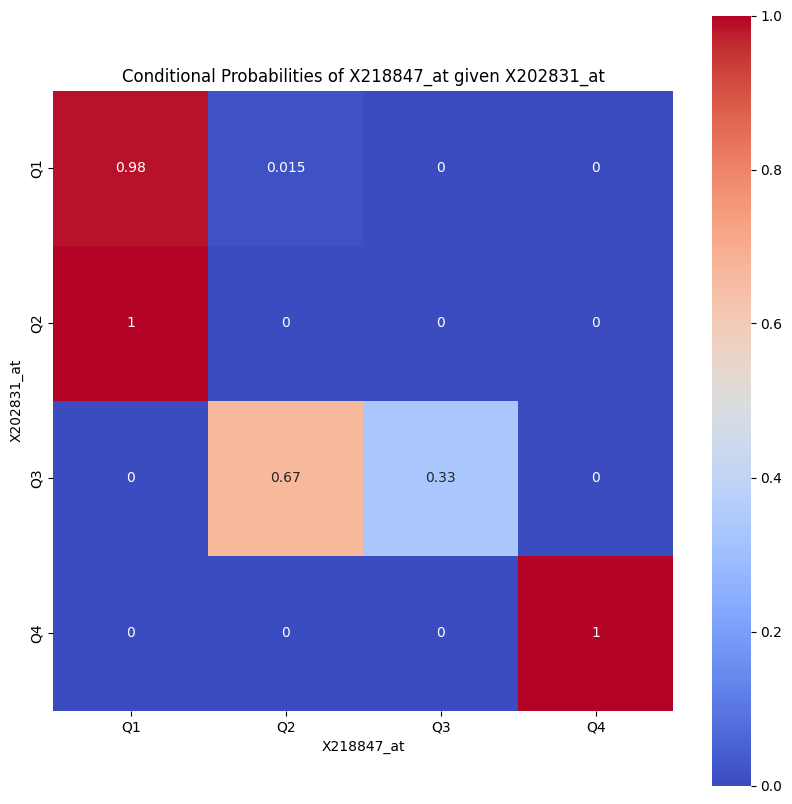

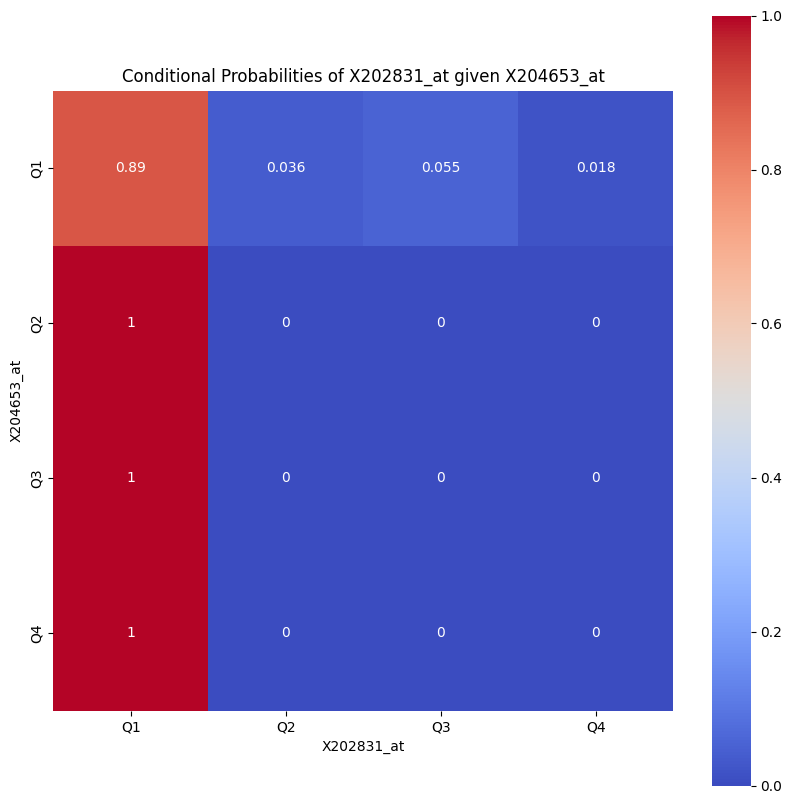

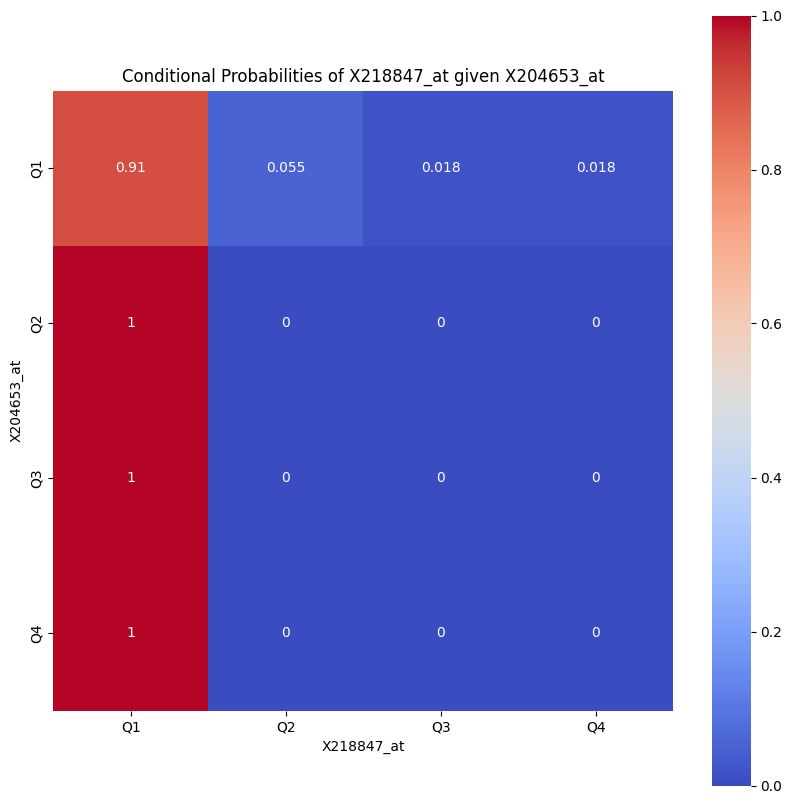

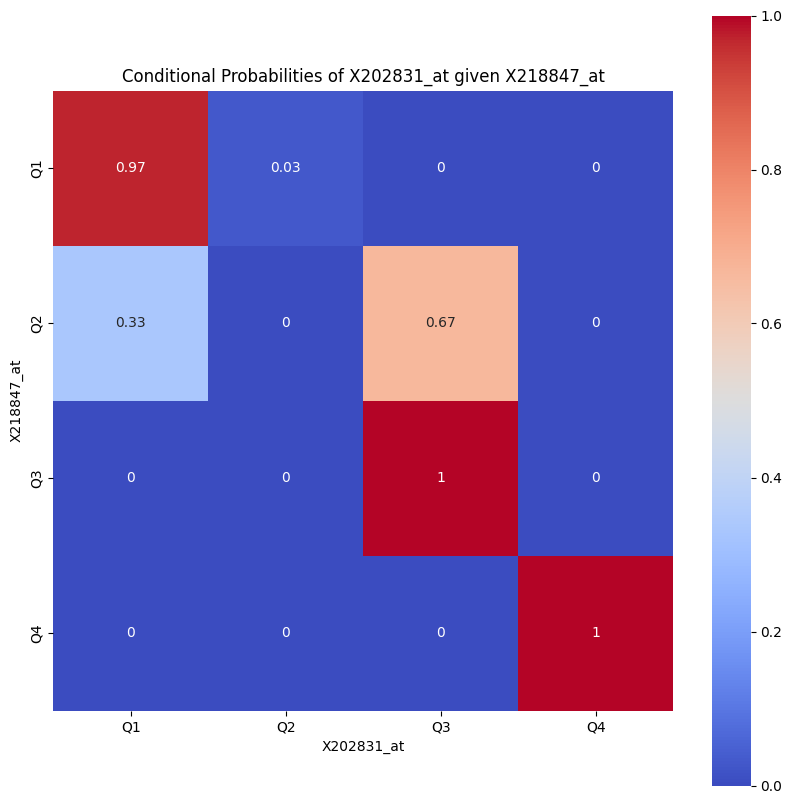

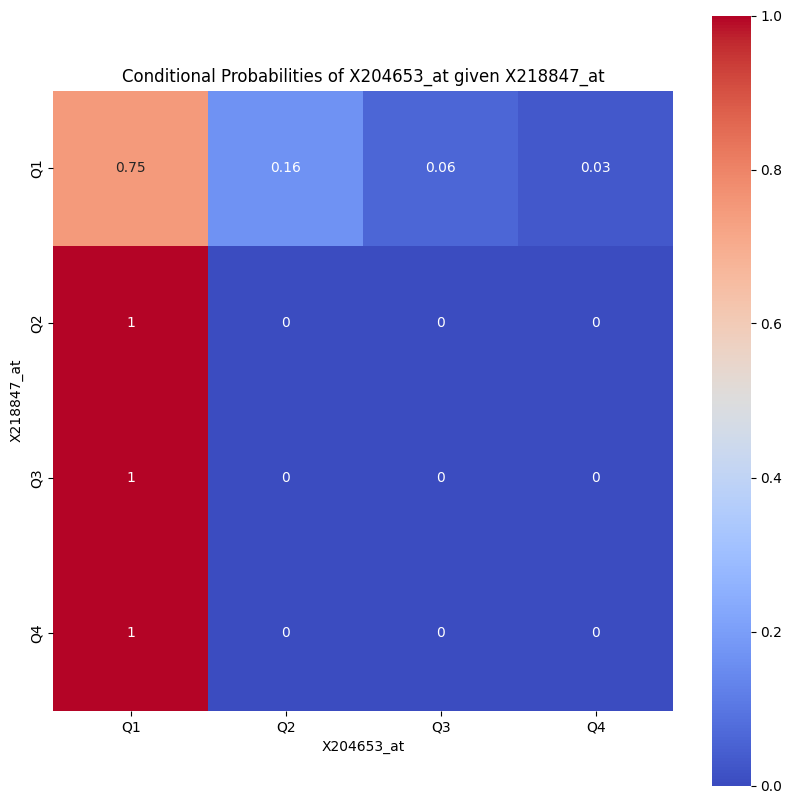

In [27]:
# visualizing conditional probabilities for each pair of features
def plot_conditional_prob(feature1, feature2):
    # Bin the continuous features into 4 equal-width bins
    X_train_binned = X_train_normalized_df.copy()
    X_train_binned[feature1] = pd.cut(X_train_normalized_df[feature1], 4, labels=["Q1", "Q2", "Q3", "Q4"])
    X_train_binned[feature2] = pd.cut(X_train_normalized_df[feature2], 4, labels=["Q1", "Q2", "Q3", "Q4"])
    
    contingency_table = pd.crosstab(X_train_binned[feature1], X_train_binned[feature2])
    prob_feature2_given_feature1 = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    plt.figure(figsize=(10, 10))
    sns.heatmap(prob_feature2_given_feature1, annot=True, cmap='coolwarm', square=True)
    plt.title(f"Conditional Probabilities of {feature2} given {feature1}")
    plt.show()
    
# looping through all pairs of features and compute conditional probabilities
for i, feature1 in enumerate(selected_features):
    for j, feature2 in enumerate(selected_features):
        if i != j:
            plot_conditional_prob(feature1, feature2)

In [36]:
from scipy.stats import ttest_ind

# visualizing conditional probabilities for each pair of features
def t_test(feature1, feature2):
    # Perform an independent t-test between two groups
    group1 = X_train_normalized_df.reset_index(drop=True).loc[Y_train.reset_index(drop=True) == 'B', feature1]
    group2 = X_train_normalized_df.reset_index(drop=True).loc[Y_train.reset_index(drop=True) == 'C', feature2]
    t_stat, p_value = ttest_ind(group1, group2)

    # Print the t-statistic and p-value
    print(f"t-statistic between {feature1} and {feature2}:", t_stat)
    print(f"p-value between {feature1} and {feature2}:", p_value)
    print("-------------------------------------------")
    
# looping through all pairs of features and compute conditional probabilities
for i, feature1 in enumerate(selected_features):
    for j, feature2 in enumerate(selected_features):
        if i != j:
            t_test(feature1, feature2)

t-statistic between X202831_at and X204653_at: 8.933592276541972
p-value between X202831_at and X204653_at: 3.499755431747421e-13
-------------------------------------------
t-statistic between X202831_at and X218847_at: -5.821781055396374
p-value between X202831_at and X218847_at: 1.6116784193298785e-07
-------------------------------------------
t-statistic between X204653_at and X202831_at: -0.9199989281769283
p-value between X204653_at and X202831_at: 0.3607329353258383
-------------------------------------------
t-statistic between X204653_at and X218847_at: -0.7563787390787693
p-value between X204653_at and X218847_at: 0.45196028511608854
-------------------------------------------
t-statistic between X218847_at and X202831_at: -5.93973524187017
p-value between X218847_at and X202831_at: 1.0005754109340743e-07
-------------------------------------------
t-statistic between X218847_at and X204653_at: 7.225924667934674
p-value between X218847_at and X204653_at: 4.83009877375601e-10

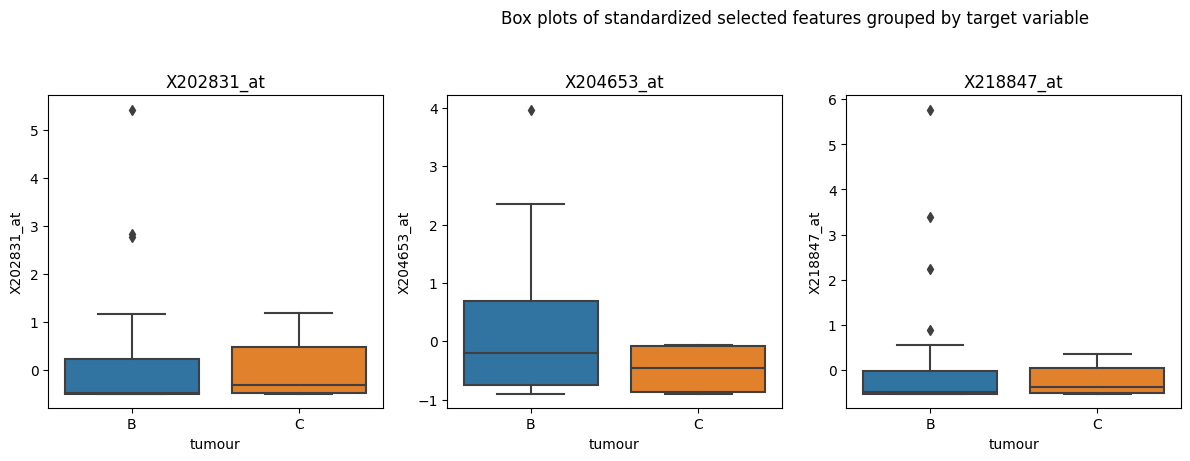

In [30]:
from sklearn.preprocessing import StandardScaler

# Joining the target variable back
scaled_selected_df = X_train_normalized_df.join(Y_train)

# Creating the subplots
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))

for i, feature in enumerate(selected_features):
    row, col = i // n_cols, i % n_cols
    sns.boxplot(x='tumour', y=feature, data=scaled_selected_df, ax=axes[row, col])
    axes[row, col].set_title(feature)

# Removing the unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.suptitle("Box plots of standardized selected features grouped by target variable")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


              precision    recall  f1-score   support

           B       0.90      1.00      0.95        18
           C       1.00      0.86      0.92        14

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32

     coefficient
0       0.047552
1       0.243623
2       0.028293
3      -0.290621
4       0.218050
..           ...
176     0.151830
177     0.096362
178    -0.067950
179     0.059722
180     0.080329

[181 rows x 1 columns]


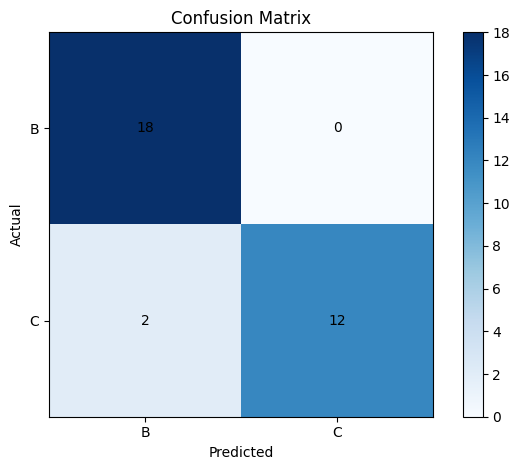

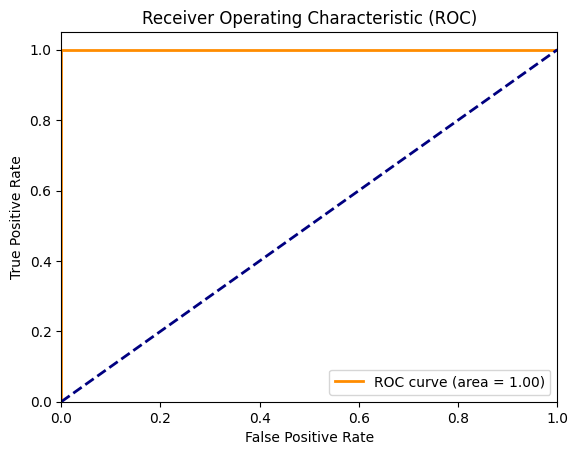

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# selecting the features
X_train = X_train_normalized_df[selected_features]
X_test = X_test_normalized_df[selected_features]

# fitting the logistic regression model
lr = LogisticRegression(penalty = 'l2',max_iter=500)
lr.fit(X_train_normalized_df, Y_train)

# making predictions
Y_pred = lr.predict(X_test_normalized_df)
Y_pred_proba = lr.predict_proba(X_test_normalized_df)[:, 1]

# printing classification report
print(classification_report(Y_test, Y_pred))

# getting the coefficients for the selected features
coefficients = pd.DataFrame({'coefficient': lr.coef_[0]})
print(coefficients)

# printing confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        plt.text(j, i, str(conf_mat[i][j]), horizontalalignment='center', verticalalignment='center')
tick_marks = np.arange(len(np.unique(df['tumour'])))
plt.xticks(tick_marks, np.unique(df['tumour']))
plt.yticks(tick_marks, np.unique(df['tumour']))
plt.tight_layout()
plt.show()

# plotting ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba, pos_label=df['tumour'].unique()[1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

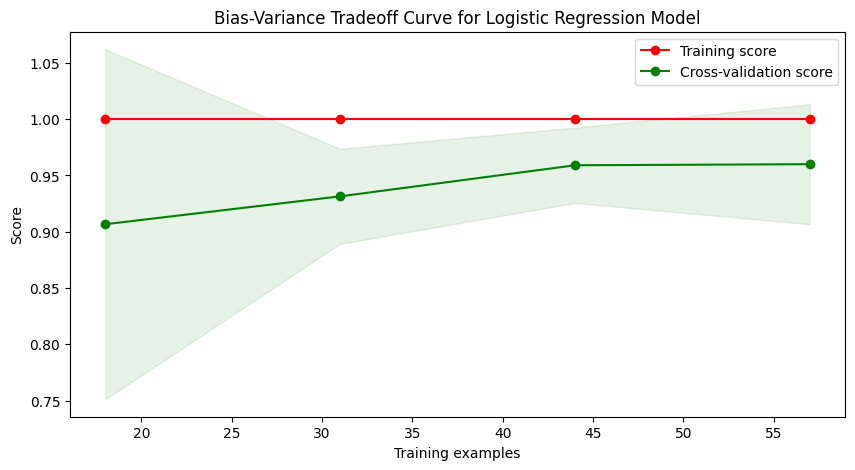

In [40]:
from sklearn.model_selection import learning_curve

# Defining function to plot bias-variance tradeoff
def plot_bias_variance_tradeoff(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train_normalized_df, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plotting the bias-variance tradeoff curve for logistic regression model
plot_bias_variance_tradeoff(lr, "Bias-Variance Tradeoff Curve for Logistic Regression Model")


In [47]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

# Install R packages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
packnames = ['lmerTest']
utils.install_packages(StrVector(packnames))

from pymer4.models import Lmer
from sklearn.metrics import accuracy_score

# Selecting the features
X_train_selected = X_train_normalized_df[['X202831_at', 'X204653_at', 'X218847_at']]
X_test_selected = X_test_normalized_df[['X202831_at', 'X204653_at', 'X218847_at']]

# Fit a hierarchical linear model (assuming a random intercept for each subject)
hlm = Lmer("tumour ~ X202831_at + X204653_at + X218847_at + (1|subject_id)", data=X_train_selected.join(Y_train))
hlm.fit()

# Predict the outcomes using HLM
Y_pred_hlm = hlm.predict(X_train_selected)
Y_pred_hlm = np.where(Y_pred_hlm >= 0.5, 'C', 'B')

# Compute the accuracy for the HLM
hlm_accuracy = accuracy_score(Y_train, Y_pred_hlm)

# Compute the accuracy for the logistic regression model
lr_accuracy = accuracy_score(Y_train, lr.predict(X_train_selected))

# Compare the accuracies
print("Logistic Regression accuracy:", lr_accuracy)
print("Hierarchical Linear Model accuracy:", hlm_accuracy)



  There is a binary version available but the source version is later:
      binary source needs_compilation
waldo  0.4.0  0.5.0             FALSE

package 'rprojroot' successfully unpacked and MD5 sums checked
package 'crayon' successfully unpacked and MD5 sums checked
package 'fs' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'brio' successfully unpacked and MD5 sums checked
package 'callr' successfully unpacked and MD5 sums checked
package 'desc' successfully unpacked and MD5 sums checked
package 'digest' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'evaluate' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package

RRuntimeError: Error in eval(predvars, data, env) : object 'subject_id' not found
